In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Matplotlib workflow

![](./images/matplotlib_workflow.png)

## Note:

There are different ways of creating a figure. We are going to be focussing on the **object-oriented API** which is more flexible than the pyplot API.

The object-oriented API creates an object Figure

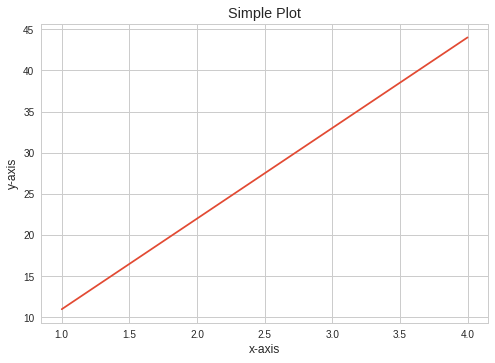

In [39]:
# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot (figure). With object-oriented API method!
fig, ax = plt.subplots()

# 3. Plot data
ax.plot(x, y); # We put semicolon to remove [] that appears above the plot

# 4. customize plot
ax.set(title='Simple Plot',
      xlabel="x-axis",
      ylabel='y-axis')

# 5. save & show (the whole figure)
fig.savefig("images/export/sample-plot.png")

# Anatomy of a Matplotlib Figure

![](./images/matplotlib-anatomy-of-a-plot-with-code.png)

# Making Figures with Numpy array

Most common plots:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [3]:
#Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

## Line plot

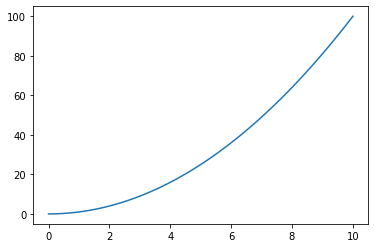

In [4]:
fig, ax = plt.subplots()
ax.plot(x, x**2);

## Scatter plot

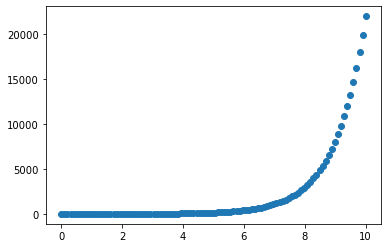

In [5]:
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

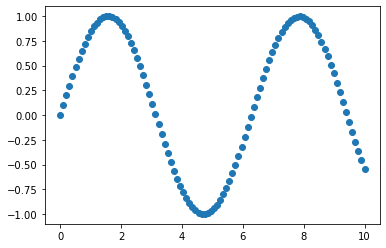

In [6]:
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

## Bar plot

### Vertical bar plot

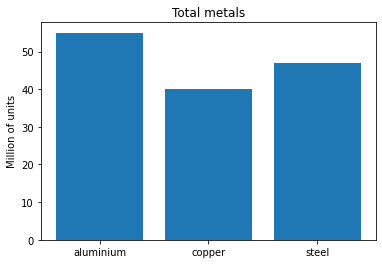

In [7]:
# Creating a bar plot from a dictionary:
metals = {"aluminium": 55, "copper": 40, "steel": 47}

fig, ax = plt.subplots()
ax.bar(metals.keys(), height=metals.values())
ax.set(title="Total metals",
      ylabel="Million of units");

### Horizontal bar plot

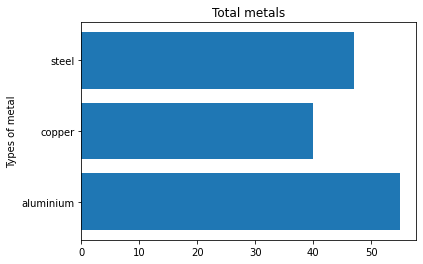

In [8]:
fig, ax = plt.subplots()
ax.barh(list(metals.keys()), metals.values())  # Note: for barh we need to transform the vertal axis to list()
ax.set(title="Total metals",
      ylabel="Types of metal");

### Histograms

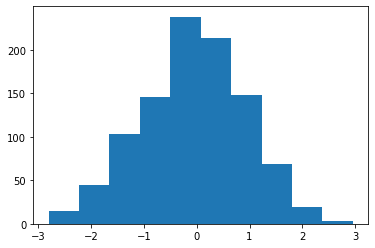

In [9]:
x = np.random.randn(1000)

fig, ax = plt.subplots()
ax.hist(x);

## Subplots

### Subplots option 1 (Recommended)

Creating different axes

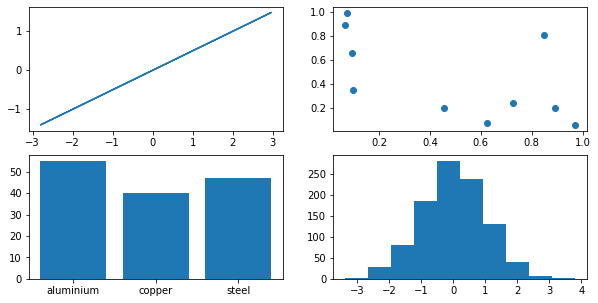

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(10, 5))

# plot for different axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(metals.keys(), metals.values());
ax4.hist(np.random.randn(1000));

### Subplots option 2

Creating a list of axes

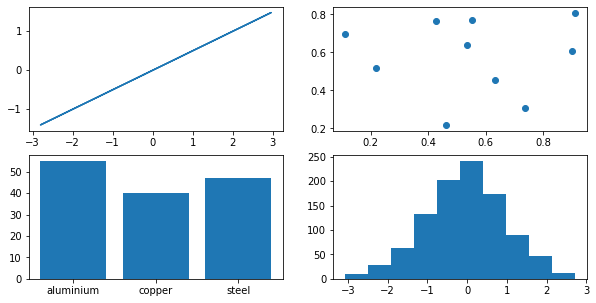

In [11]:
fig, ax = plt.subplots(nrows=2,
                       ncols=2,
                       figsize=(10, 5))

# plot for different indexes
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(metals.keys(), metals.values());
ax[1, 1].hist(np.random.randn(1000));

# Plotting from Pandas Series & DataFrames

Note: Pandas comes with matplotlib built-in and we can directly plot using `pd.plot()`

Note: `pd.plot` is the pyplot API method (less flexible than OO method). However it serves as good example for plotting quickly

## Pandas Pyplot API method

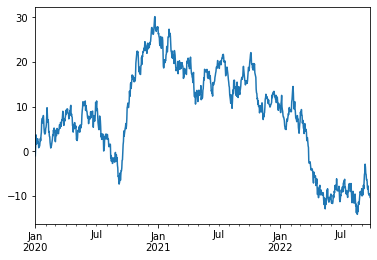

In [12]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2020", periods=1000))
ts = ts.cumsum()  # Accumulative sum (for having ascending gradient)
ts.plot();

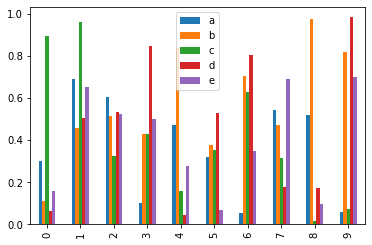

In [13]:
x = np.random.rand(10, 5)

df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd', 'e'])

df.plot(kind="bar");
# df.plot.bar();  # Another way of plotting a specific type of graph

### Car sales dataset

In [14]:
car_sales = pd.read_csv("/home/carlosg/dev/zero-to-mastery-ml-master/data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [15]:
# Transforming Price to integers
car_sales["Price"] = car_sales["Price"].str.replace("[\W]", "", regex=True).astype(int)
car_sales["Price"] = car_sales["Price"]//100
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [16]:
# Creating a new column
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [17]:
car_sales["Total sales"] = car_sales["Price"].cumsum()  # Cumsum() to add cumutilative
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


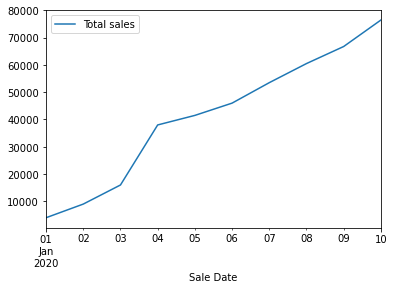

In [18]:
car_sales.plot(x="Sale Date", y="Total sales");

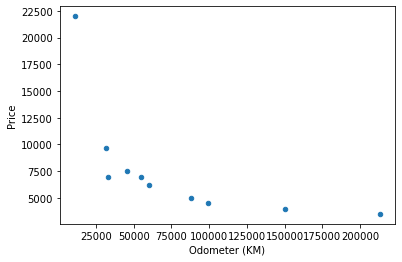

In [19]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

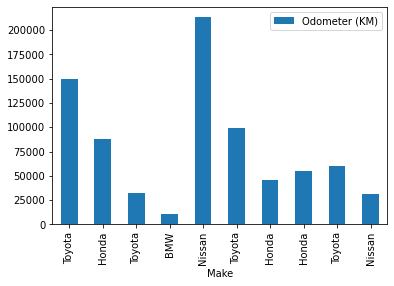

In [20]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

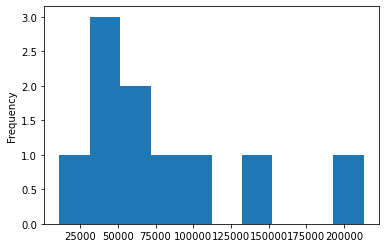

In [21]:
car_sales["Odometer (KM)"].plot.hist();

Note: `hist()` accepts the argument `bins=`, which is the number of bars displayed. By default is 10

In [22]:
heart_disease = pd.read_csv("/home/carlosg/dev/zero-to-mastery-ml-master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Heart disease dataset

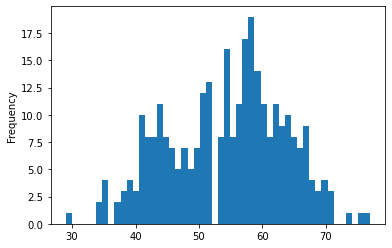

In [23]:
heart_disease["age"].plot.hist(bins=50);

### Pandas subplots

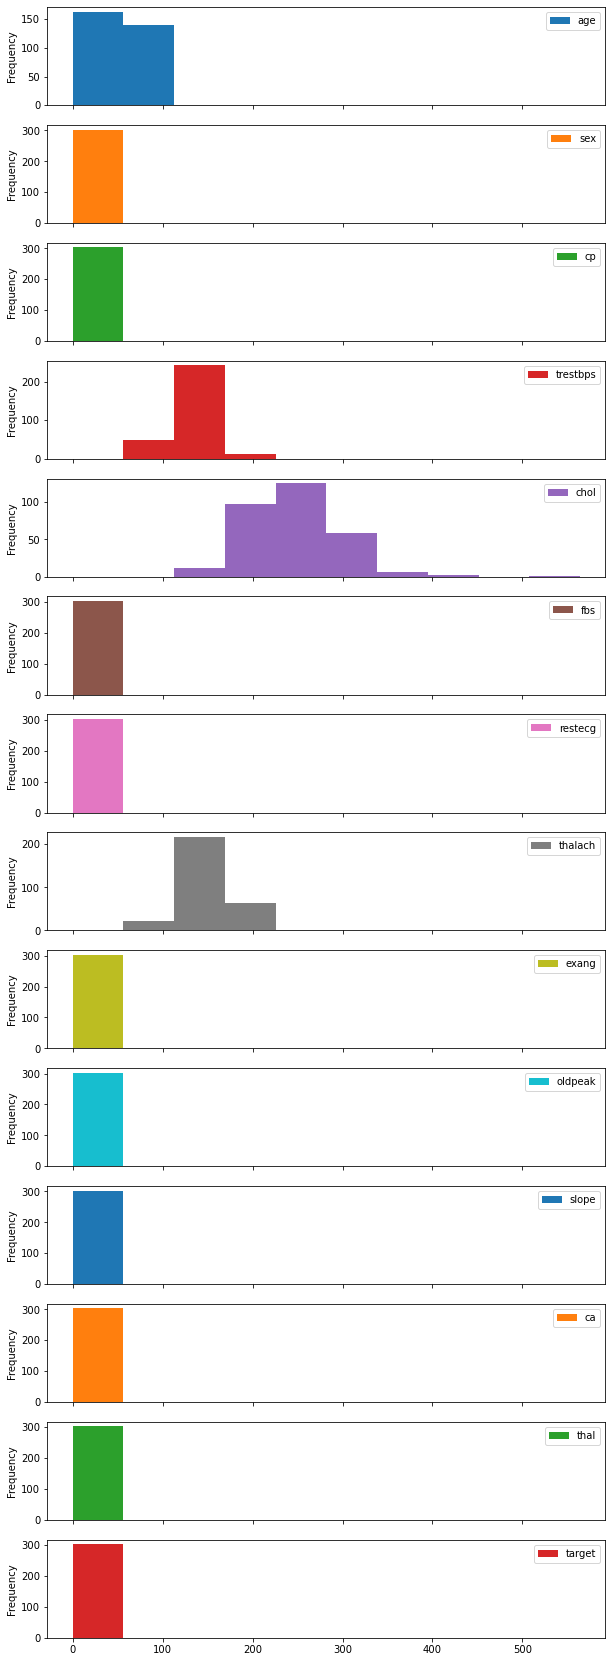

In [24]:
heart_disease.plot.hist(figsize=(10, 30), subplots=True);

In [25]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


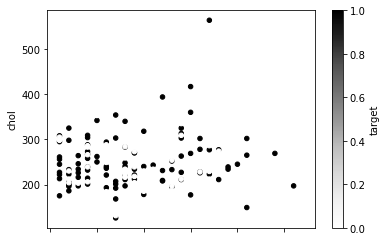

In [26]:
over_50.plot(kind='scatter', x='age', y='chol', c='target');

## Pandas Object-oriented API method

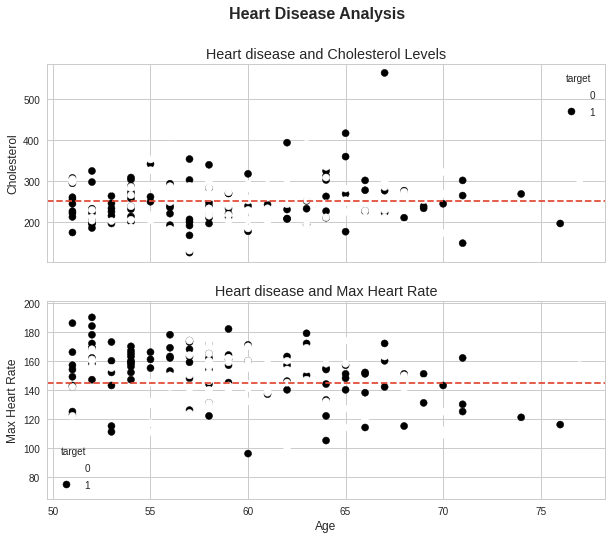

In [41]:
# OO method comparing 2 subplots.
# ax0: Cholesterol and Age
# ax1: Max Heart Rate and Age

fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10, 8),
                               sharex=True)  # sharex means that we are going to use the same x axis and thus, is better to share it rather than write it twice

# --- ax0
# Add data
scatter = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"])

# Customize the plot
ax0.set(title="Heart disease and Cholesterol Levels",
       # xlabel="Age",  We don't need this axis here since we use sharex
       ylabel="Cholesterol")

# Add a legend. If we have handles with labes, we can make it visible with: ax0.legend().set_visible(True)
ax0.legend(*scatter.legend_elements(), title="target")  # *scatter.legend_elements() unpacks all the elements from the 'c' parameter.

# Add a horizontal dotted mean line
ax0.axhline(over_50["chol"].mean(),
            linestyle='--');

# --- ax1
# Add data
scatter = ax1.scatter(x=over_50["age"], 
                      y=over_50["thalach"], 
                      c=over_50["target"])

# Customize plot
ax1.set(title="Heart disease and Max Heart Rate",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Add legend
ax1.legend(*scatter.legend_elements(), title='target')

# Add a horizontal dotted mean line
ax1.axhline(over_50["thalach"].mean(),
            linestyle="--");

# --- fig
# Add title
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

# Customizing Matplotlib plots and getting stylish

The style above is the one which comes by thefault in matplotlib. However, we can customize it to our liking.

In [28]:
# See the different styles avaialable
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

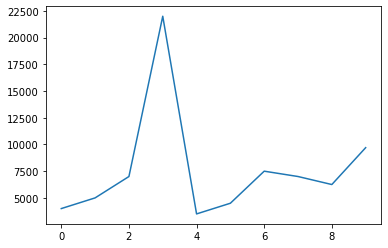

In [29]:
car_sales["Price"].plot();

In [30]:
plt.style.use('seaborn-whitegrid')  # It updates the maplotlib style internally for the rest of the programmea

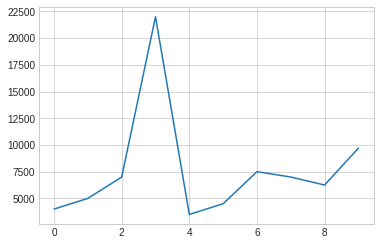

In [31]:
car_sales["Price"].plot();

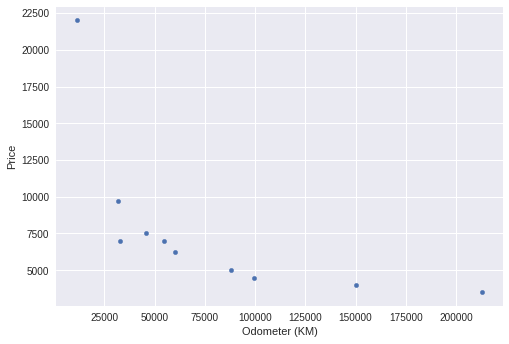

In [32]:
plt.style.use('seaborn')
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

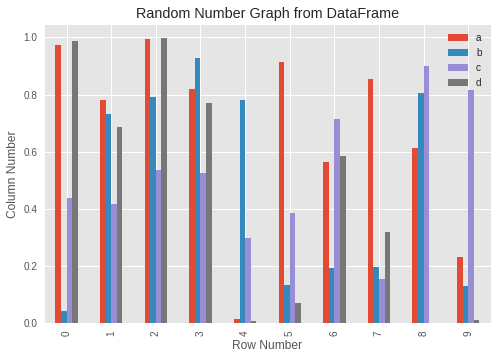

In [33]:
plt.style.use('ggplot')

x = np.random.rand(10, 4)
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])

ax = df.plot(kind='bar')

ax.set(title="Random Number Graph from DataFrame",
       xlabel="Row Number",
       ylabel="Column Number")

ax.legend().set_visible(True)

# Final Result

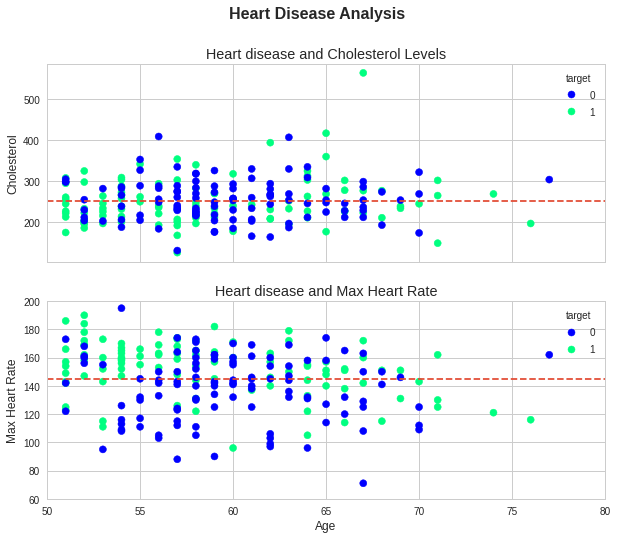

In [42]:
plt.style.use('seaborn-whitegrid')

fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10, 8),
                               sharex=True)



# --- ax0
# Add data
scatter = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"],
                      cmap="winter") # This changes the colour scheme

# Customize the plot
ax0.set(title="Heart disease and Cholesterol Levels",
       ylabel="Cholesterol")

# Change x and y limits (to fit the plot better in ax)
ax0.set_xlim([50, 80])
# ax0.set_ylim([60, 200])

# Add a legend
ax0.legend(*scatter.legend_elements(), title="target")

# Add a horizontal dotted mean line
ax0.axhline(over_50["chol"].mean(),
            linestyle='--');



# --- ax1
# Add data
scatter = ax1.scatter(x=over_50["age"], 
                      y=over_50["thalach"], 
                      c=over_50["target"],
                      cmap="winter")

# Customize plot
ax1.set(title="Heart disease and Max Heart Rate",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Change x and y limits (to fit the plot better in ax)
ax1.set_xlim([50, 80])  # This one is not necessary since we share x axis
ax1.set_ylim([60, 200])

# Add legend
ax1.legend(*scatter.legend_elements(), title='target')

# Add a horizontal dotted mean line
ax1.axhline(over_50["thalach"].mean(),
            linestyle="--");



# --- fig
# Add title
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");


# Saving an d exporting the figure
fig.savefig("images/export/heart-disease-analysis-plot-saved.png")

Note: for checking all cmap options inside of matplorlib, go to:
https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html